In [418]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap

In [409]:
# Getting the base directory 
base_directory = '/Users/nt/Desktop/DS2500/'

# Defining the file paths  
file_paths = [base_directory + f'{year}.csv' for year in range(2015, 2024)]

# Create a list to store individual DataFrames
data_frames = []

# Loading data and appending to the list
for path in file_paths:
    data_frames.append(pd.read_csv(path))

# Concatenate all DataFrames into one big DataFrame
big_dataframe = pd.concat(data_frames, ignore_index=True)

/var/folders/25/k80xgfp945v9hr0_xm4s6h2c0000gn/T/ipykernel_34473/2606868137.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames.append(pd.read_csv(path))
/var/folders/25/k80xgfp945v9hr0_xm4s6h2c0000gn/T/ipykernel_34473/2606868137.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames.append(pd.read_csv(path))
/var/folders/25/k80xgfp945v9hr0_xm4s6h2c0000gn/T/ipykernel_34473/2606868137.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames.append(pd.read_csv(path))
/var/folders/25/k80xgfp945v9hr0_xm4s6h2c0000gn/T/ipykernel_34473/2606868137.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames.append(pd.read_csv(path))
/var/folders/25/k80xgfp945v9hr0_xm4s6h2c0000gn/T/ipykernel_34473/2606868137.py:12: DtypeWarning: Columns (0)

In [410]:
# Drop columns that are not needed
big_dataframe.drop(columns=['SHOOTING', 'HOUR', "UCR_PART", "INCIDENT_NUMBER", "OCCURRED_ON_DATE"], inplace=True)

In [411]:
# shows a bit of the data
big_dataframe.head(15)

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,STREET,Lat,Long,Location
0,2629,Harassment,HARASSMENT,C11,397,2015,6,Monday,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)"
1,3201,Property Lost,PROPERTY - LOST,NaN,,2015,6,Monday,BERNARD,NaN,NaN,NaN
2,3201,Property Lost,PROPERTY - LOST,B3,433,2015,6,Monday,NORFOLK ST,42.283634,-71.082813,"(42.28363434, -71.08281320)"
3,3115,Investigate Person,INVESTIGATE PERSON,A7,20,2015,6,Monday,PARIS ST,42.377023,-71.032247,"(42.37702319, -71.03224730)"
4,2647,Other,THREATS TO DO BODILY HARM,C11,359,2015,6,Monday,WASHINGTON ST,42.293606,-71.071887,"(42.29360585, -71.07188650)"
5,3201,Property Lost,PROPERTY - LOST,B2,282,2015,6,Monday,WASHINGTON ST,42.328663,-71.085634,"(42.32866284, -71.08563401)"
6,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,B3,456,2015,6,Monday,HARLEM ST,42.300217,-71.080979,"(42.30021684, -71.08097940)"
7,3130,Search Warrants,SEARCH WARRANT,A7,20,2015,6,Monday,PARIS ST,42.377023,-71.032247,"(42.37702319, -71.03224730)"
8,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,93,2015,6,Monday,FANEUIL HALL SQ,42.360205,-71.056208,"(42.36020464, -71.05620816)"
9,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,D4,155,2015,6,Monday,CONCORD SQ,42.341384,-71.078989,"(42.34138415, -71.07898883)"


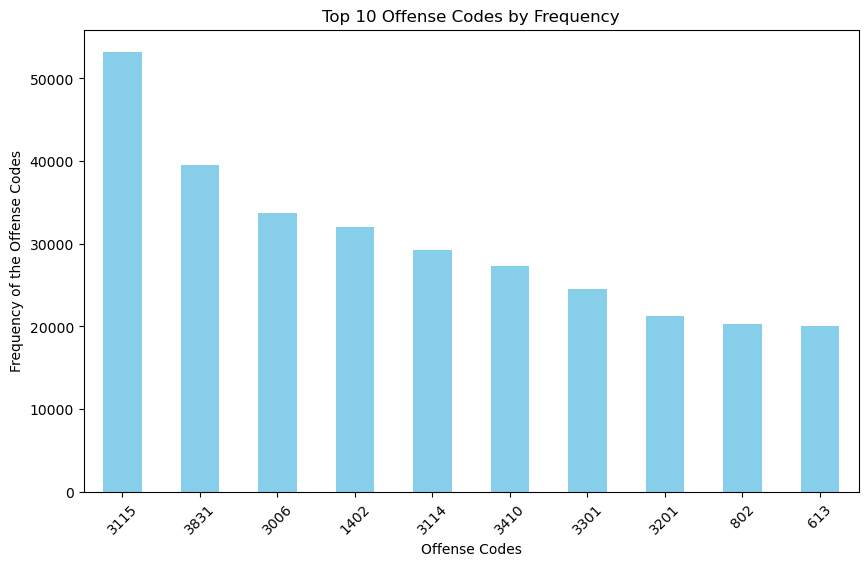

In [412]:
# Get the value counts of offense codes and select the top ten
offense_codes = big_dataframe['OFFENSE_CODE'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
offense_codes.plot(kind='bar', color='skyblue')
plt.xlabel('Offense Codes')
plt.ylabel('Frequency of the Offense Codes')
plt.title('Top 10 Offense Codes by Frequency')
plt.xticks(rotation=45) 
plt.show()


## OFFENSE CODE TITLES:
3115: INVESTIGATE PERSON,
3831: M/V - LEAVING SCENE - PROPERTY DAMAGE,
3006: SICK/INJURED/MEDICAL - PERSON,
1402: VANDALISM,
3114: INVESTIGATE PROPERTY,
3410: TOWED,
3301: VERBAL DISPUTES,
3201: PROPERTY - LOST,	
802: SIMPLE ASSULT, 
613: LARCENY

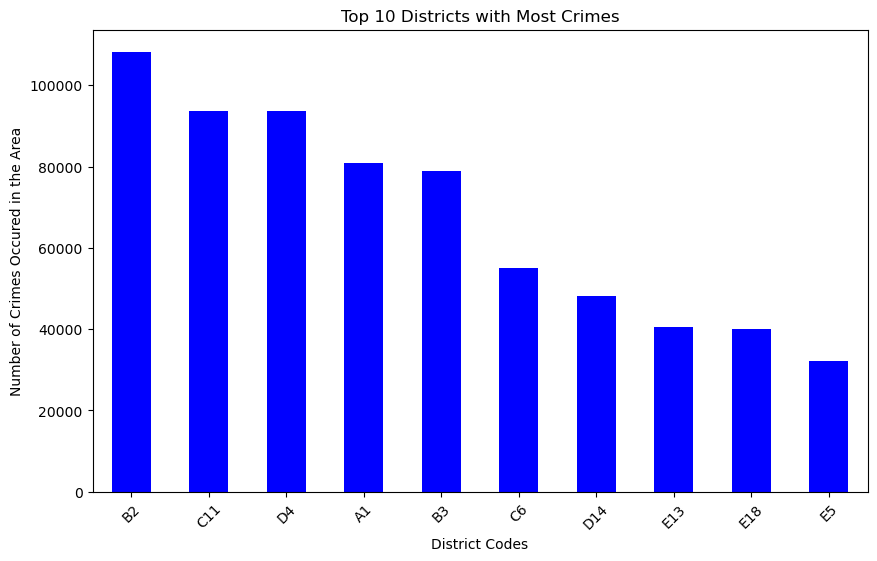

In [413]:
# Get the value counts of Distrcits and select the top ten
district = big_dataframe['DISTRICT'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
district.plot(kind='bar', color='blue')
plt.xlabel('District Codes')
plt.ylabel('Number of Crimes Occured in the Area')
plt.title('Top 10 Districts with Most Crimes')
plt.xticks(rotation=45) 
plt.show()

## The Names of The Areas:
B2: Roxbury,
C11: Dorchester,
D4: South End,
A1: Downtown,
B3: Mattapan,
C6:South Boston,
D14: Brighton,
E13:Jamaica Plain,
E18:Hyde Park,
E5: West Roxbury              

Civilians need to be more cautious when navigating these areas since the likelihood of offenses occurring is higher. The highest occurrence is in Roxbury, suggesting it is one of the most dangerous areas in Boston. Further investigation in Roxbury is needed to enhance the safety and security of its residents.

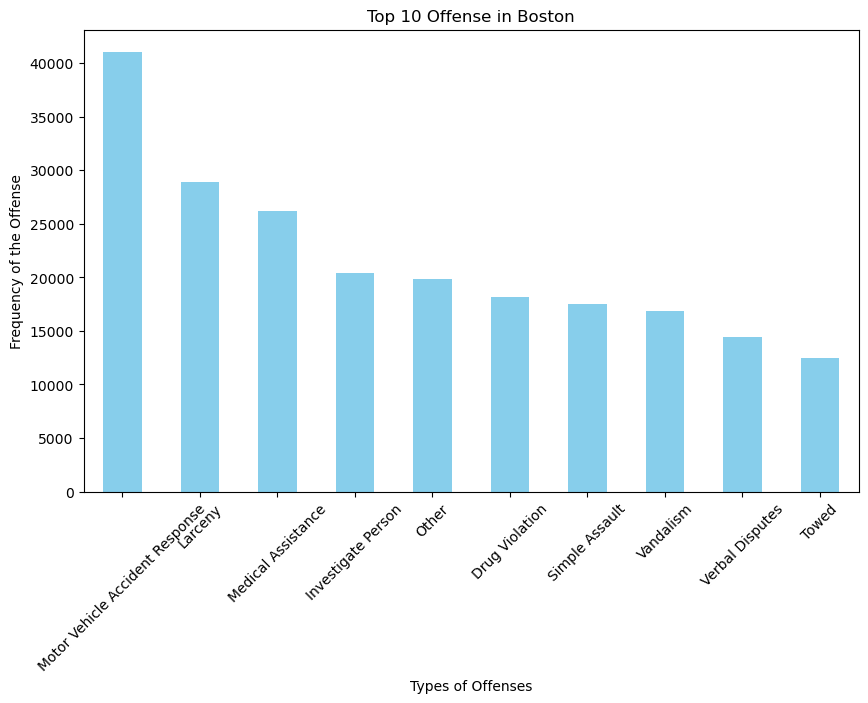

In [414]:
# Get the value counts of offense codes groups and select the top ten
offense = big_dataframe['OFFENSE_CODE_GROUP'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
offense.plot(kind='bar', color='skyblue')
plt.xlabel('Types of Offenses')
plt.ylabel('Frequency of the Offense')
plt.title('Top 10 Offense in Boston')
plt.xticks(rotation=45)
plt.show()


This shows that the majority of crimes are related to motor vehicle accidents. This suggests a high traffic volume or an overabundance of vehicles in Boston. Increased surveillance on crowded streets may be necessary to prevent these accidents from occurring. Now considering the second most frequent crime, the Boston Police Department should enhance street security to reduce incidents of petty theft.

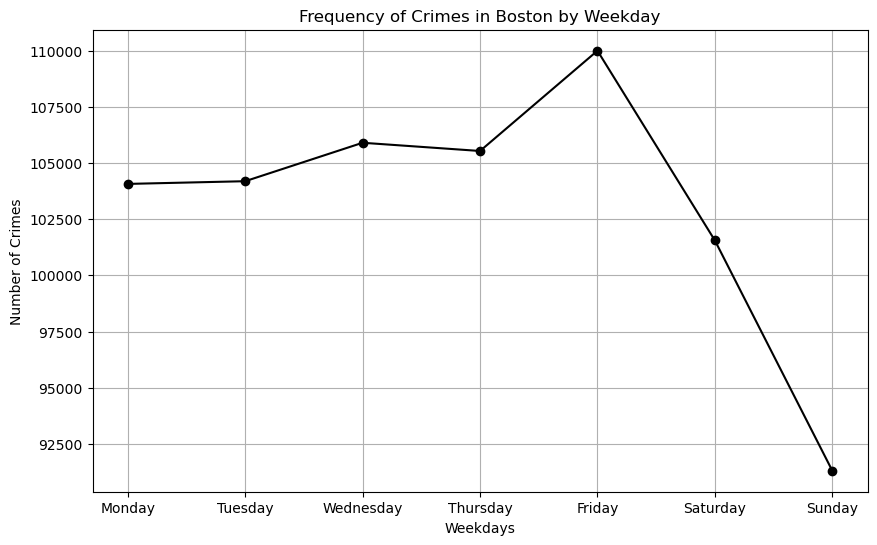

In [415]:

# Get the value counts for each day 
weeks = big_dataframe['DAY_OF_WEEK'].value_counts().head(10)

# Defines the order of days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the line chart
plt.figure(figsize=(10, 6))
weeks[days].plot(kind='line', marker='o', color='black')  
plt.xlabel('Weekdays')
plt.ylabel('Number of Crimes')
plt.title('Frequency of Crimes in Boston by Weekday')
plt.xticks(range(len(days)), days)  
plt.grid(True)
plt.show()



As the week progresses, crime rates generally rise but notably decrease after Friday. This trend is intriguing, especially considering that most people have weekends off, yet this doesn't have any correlation with crime rates. The highest number of crimes tends to occur on Fridays, so citizens should be more careful during that day. 

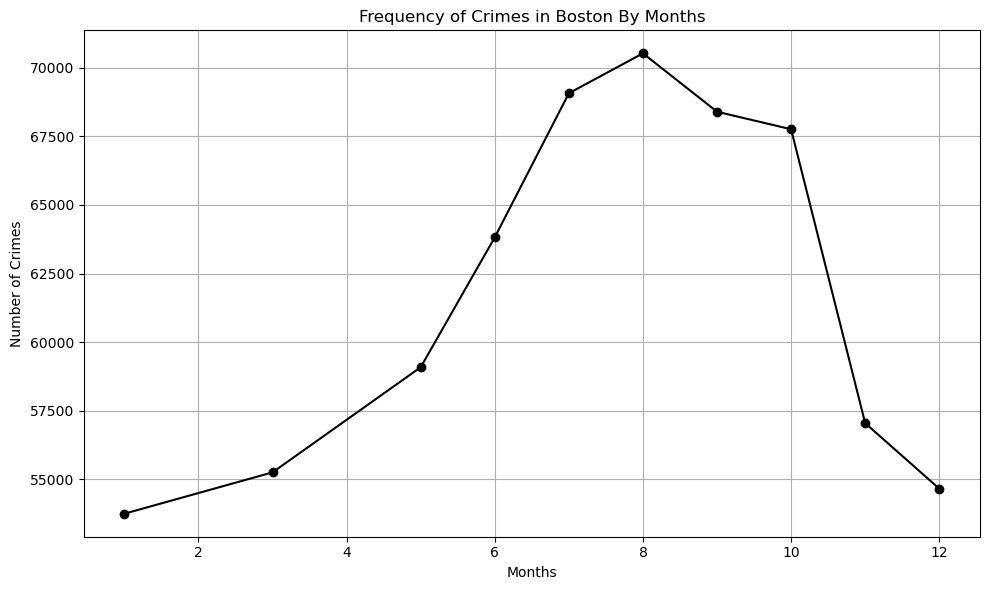

In [416]:
import matplotlib.pyplot as plt

# Get the value counts for each month
by_months = big_dataframe['MONTH'].value_counts().head(10)

# Plot the line chart
plt.figure(figsize=(10, 6))
by_months.sort_index().plot(kind='line', marker='o', color='black')  
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.title('Frequency of Crimes in Boston By Months') 
plt.tight_layout()
plt.grid(True)
plt.show()


As we approach summer, crime rates tend to increase but significantly drop as we transition into fall. This trend could be due to an influx of tourists and increased free time for individuals during the summer months. Notably, August records the highest amount of crime, meaning citizens need to be more careful during this month.

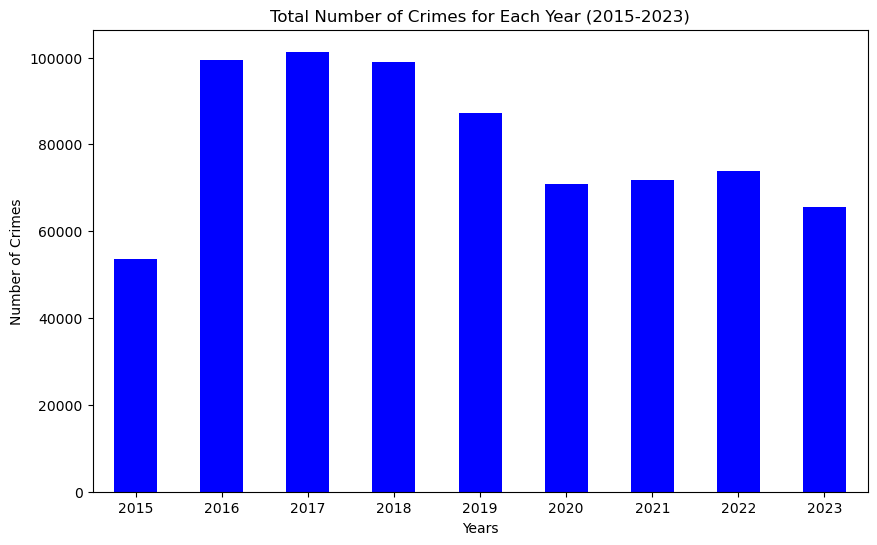

In [417]:
# Check if the year column exists in the DataFrame
if 'YEAR' in big_dataframe.columns:
    # Group the data by year and count the occurrences
    crime_by_year = big_dataframe['YEAR'].value_counts().sort_index()

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    crime_by_year.plot(kind='bar', color='blue')
    plt.xlabel('Years')
    plt.ylabel('Number of Crimes')
    plt.title('Total Number of Crimes for Each Year (2015-2023)')
    plt.xticks(rotation=360)  
    plt.show()

Further investigation is required due to significant missing data, potentially influencing variations in crime rates among different years. Furthermore, it is essential to acknowledge the impact of COVID-19, which could have contributed to fluctuations in crime rates around 2020-2021 period. Then for the year 2023, the lack of data could have led to lower number of crimes.